In [1]:
import json

# Open JSON with credentials
f = open('credentials.json')
  
# returns JSON object as a dictionary
cred = json.load(f)
  
# read credentials
user = cred['user']
password = cred['password']
account = cred['account']
warehouse = cred['warehouse']
  
# Close file
f.close()

In [2]:
import snowflake.connector
from snowflake.sqlalchemy import URL 
from sqlalchemy import create_engine 

# create connection for pandas
engine = create_engine(URL( 
                        user = user,
                        account = account,
                        password = password,
                        warehouse = warehouse,
                        database = 'COVID19', 
                        schema = 'PUBLIC'
                        ))

engine_con = engine.connect() # Best practice

In [3]:
import pandas as pd

# min and max date in the table
query = 'SELECT min(date) as min, max(date) as max FROM ECDC_GLOBAL;'

# Execute SQL query
pd.read_sql(con = engine_con,  sql = query)

,min,max
0,2019-12-31,2020-12-14


In [4]:
# cases and deaths for country
query = 'SELECT COUNTRY_REGION, SUM(cases) as cases, SUM(deaths) as deaths, SUM(deaths)/SUM(cases)*100 as ratio FROM ECDC_GLOBAL GROUP BY COUNTRY_REGION ORDER BY 3 DESC LIMIT 10;'

# format thousands and decimals
pd.options.display.float_format = '{:,.2f}'.format

pd.read_sql(con = engine_con,  sql = query)

,country_region,cases,deaths,ratio
0,United States,"16,256,754.00","299,177.00",1.84
1,Brazil,"6,901,952.00","181,402.00",2.63
2,India,"9,884,100.00","143,355.00",1.45
3,Mexico,"1,250,044.00","113,953.00",9.12
4,Italy,"1,843,712.00","64,520.00",3.50
5,United_Kingdom,"1,849,403.00","64,170.00",3.47
6,France,"2,376,852.00","57,911.00",2.44
7,"Iran, Islamic Republic of","1,108,269.00","52,196.00",4.71
8,Spain,"1,730,575.00","47,624.00",2.75
9,Russian Federation,"2,653,928.00","46,941.00",1.77


In [5]:
query = 'SELECT MONTH(date) as month, SUM(cases) as cases FROM ECDC_GLOBAL WHERE YEAR(date)=2020 AND MONTH(date)<12 GROUP BY MONTH(date) ORDER BY MONTH(date);'

# Execute SQL query and data into a Pandas DF
df = pd.read_sql(con = engine_con,  sql = query)

display(df)

,month,cases
0,1,"9,799.00"
1,2,"75,422.00"
2,3,"723,738.00"
3,4,"2,339,594.00"
4,5,"2,891,996.00"
5,6,"4,249,525.00"
6,7,"7,067,524.00"
7,8,"7,963,836.00"
8,9,"8,456,248.00"
9,10,"11,949,041.00"


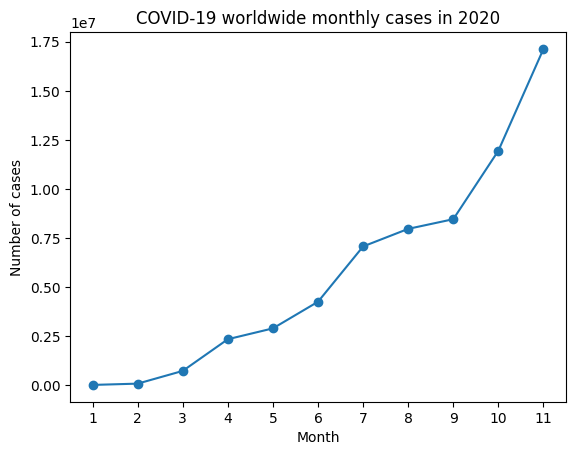

In [6]:
import matplotlib.pyplot as plt 

# Plot
plt.plot(df.month, df.cases, marker='o')

# labels
plt.title("COVID-19 worldwide monthly cases in 2020")
plt.xlabel("Month")
plt.ylabel("Number of cases")
plt.xticks(df.month)

plt.show()